# Logistic Regression on the Olivetti faces dataset

In [18]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sklearn.datasets as df
# Import Olivetti Faces data
data=df.fetch_olivetti_faces(data_home=None, shuffle=True, random_state=10, download_if_missing=True)
targets = data.target
X = data.data
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.10, random_state=42)

C:\Anacounda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Pedram's Machine\scikit_learn_data


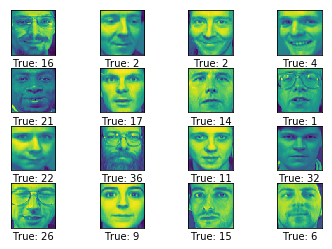

In [40]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 40

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
#         ax.imshow(images[i].reshape(img_shape), cmap='binary')
        ax.imshow(images[i].reshape(img_shape))
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.

    plt.show()


# Get the first images from the test-set.
images = X_test

# Get the true classes for those images.
cls_true = y_test

img_size = 64
img_shape = (img_size, img_size)
img_size_flat = img_size * img_size

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [19]:
# Parameters
learning_rate = 0.01
training_epochs = 25
display_step = 1

In [20]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(360, 4096)) # olivetti data image of shape 64*64=4096
y = tf.placeholder(tf.float32, shape=(360,)) #  Face recognition => 100 classes

In [21]:
# Set model weights
W = tf.Variable(tf.zeros([4096, 360]))
b = tf.Variable(tf.zeros([360]))

In [22]:
# Construct model
pred = tf.sigmoid(tf.matmul(x, W) + b) # Softmax

In [23]:
# Minimize error using cross entropy
cost = tf.reduce_mean(-(y*tf.log(pred)+(1+y)*tf.log(1-pred)))

In [24]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [25]:
# Initialize the variables (i.e. assign their default value)
# init = tf.global_variables_initializer()
sess= tf.InteractiveSession()
tf.global_variables_initializer().run()
# Start training

In [26]:
# Training cycle
for epoch in range(training_epochs):
    idx = np.random.choice(len(X_train),replace=False)
        # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer, cost], feed_dict={x: X_train,y: y_train})
        # Compute average loss
    
    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

# Test model

Epoch: 0001 cost= 27.618331909
Epoch: 0002 cost= 27.610502243
Epoch: 0003 cost= 27.607051849
Epoch: 0004 cost= 27.604982376
Epoch: 0005 cost= 27.603807449
Epoch: 0006 cost= 27.602445602
Epoch: 0007 cost= 27.601100922
Epoch: 0008 cost= 27.600124359
Epoch: 0009 cost= 27.599594116
Epoch: 0010 cost= 27.598991394
Epoch: 0011 cost= 27.598352432
Epoch: 0012 cost= 27.597846985
Epoch: 0013 cost= 27.597295761
Epoch: 0014 cost= 27.596874237
Epoch: 0015 cost= 27.596424103
Epoch: 0016 cost= 27.596054077
Epoch: 0017 cost= 27.595760345
Epoch: 0018 cost= 27.595481873
Epoch: 0019 cost= 27.595174789
Epoch: 0020 cost= 27.594861984
Epoch: 0021 cost= 27.594509125
Epoch: 0022 cost= 27.594127655
Epoch: 0023 cost= 27.593826294
Epoch: 0024 cost= 27.593519211
Epoch: 0025 cost= 27.593248367
Optimization Finished!


In [27]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(40, 4096)) # olivetti data image of shape 64*64=4096
y = tf.placeholder(tf.float32, shape=(40,)) #  Face recognition => 100 classes

In [28]:
# Set model weights
W = tf.Variable(tf.zeros([4096, 40]))
b = tf.Variable(tf.zeros([40]))
pred = tf.sigmoid(tf.matmul(x, W) + b) # Softmax
sess= tf.InteractiveSession()

In [32]:
print(pred)

Tensor("Sigmoid_1:0", shape=(40, 40), dtype=float32)


In [48]:
data_png=df.fetch_olivetti_faces
data_png
from sklearn import decomposition
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = np.random.seed(0)

# #############################################################################
# Load faces data
dataset = df.fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Dataset consists of 400 faces
